# DS322 - Machine Learning 
### Instructor:  Mr. Matthew R. Maulion, MSc

#### Name of Student: Nephea R. Cagas | DS3A

**Assignment: kNN Regression Implementation** <br>

(lndividual) Consider again the Cosine signal sampled N times, i.e.

    X = np.linspace(0.0, 10.0, N) N = 150
    y = np.cos(2*np.pi*X)

Plot as a function of N the test accuracy for n_neighbors = 1,3,5,10,100. Provide 2-3 sentences analysis of your result (discuss something about underfitting/overfitting), use 75:25 training:test ratio.


In [11]:
import mglearn 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pylab as plot

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

Text(0, 0.5, 'Target')

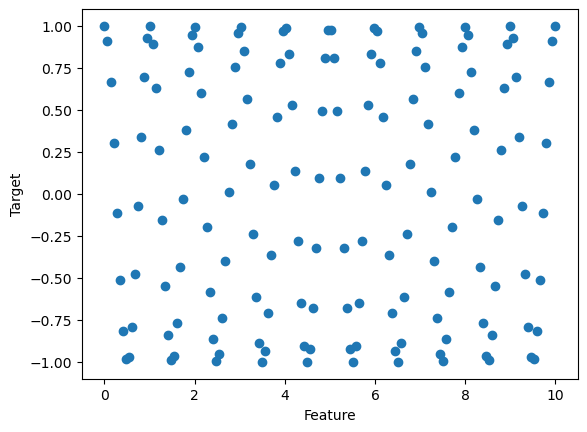

In [3]:
N = 150
X = np.linspace(0.0, 10.0, N)
y = np.cos(2*np.pi*X)

plt.plot(X, y, 'o')
plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-1.1, 1.1)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
from numpy import array
XX=np.reshape(X, (len(X),-1))

XX

array([[ 0.        ],
       [ 0.06711409],
       [ 0.13422819],
       [ 0.20134228],
       [ 0.26845638],
       [ 0.33557047],
       [ 0.40268456],
       [ 0.46979866],
       [ 0.53691275],
       [ 0.60402685],
       [ 0.67114094],
       [ 0.73825503],
       [ 0.80536913],
       [ 0.87248322],
       [ 0.93959732],
       [ 1.00671141],
       [ 1.0738255 ],
       [ 1.1409396 ],
       [ 1.20805369],
       [ 1.27516779],
       [ 1.34228188],
       [ 1.40939597],
       [ 1.47651007],
       [ 1.54362416],
       [ 1.61073826],
       [ 1.67785235],
       [ 1.74496644],
       [ 1.81208054],
       [ 1.87919463],
       [ 1.94630872],
       [ 2.01342282],
       [ 2.08053691],
       [ 2.14765101],
       [ 2.2147651 ],
       [ 2.28187919],
       [ 2.34899329],
       [ 2.41610738],
       [ 2.48322148],
       [ 2.55033557],
       [ 2.61744966],
       [ 2.68456376],
       [ 2.75167785],
       [ 2.81879195],
       [ 2.88590604],
       [ 2.95302013],
       [ 3

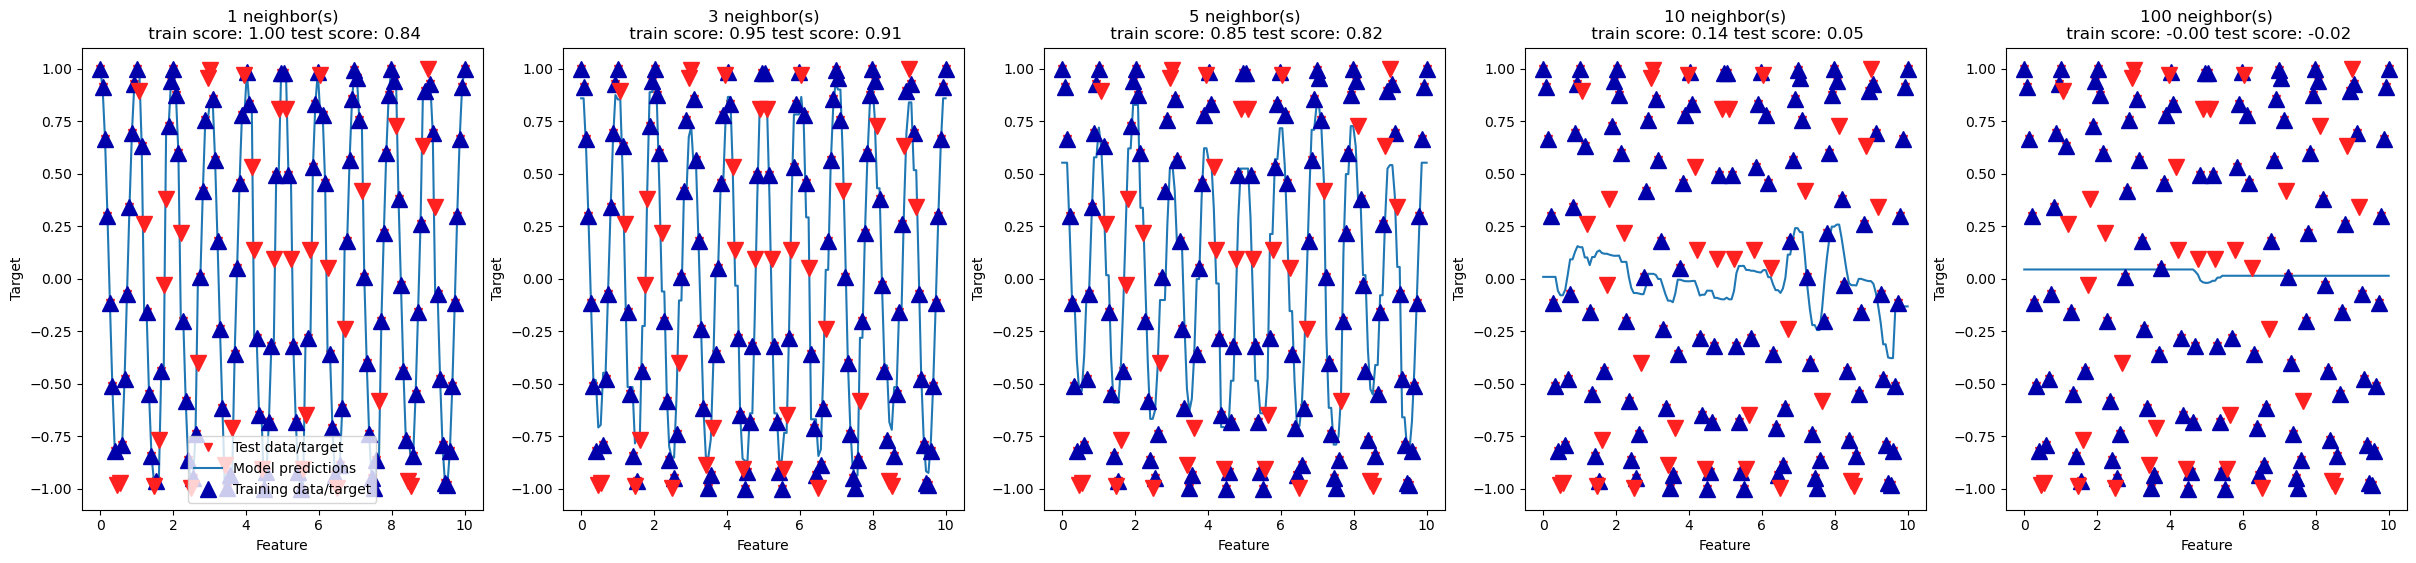

In [5]:
# Split the data into training and testing sets with a 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=0)

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(30, 6))

# Generate a line for plotting predictions
line = np.linspace(0, 10, len(XX)).reshape(len(XX), -1)

for n_neighbors, ax in zip([1, 3, 5, 10, 100], axes):
    # Initialize and fit the KNeighborsRegressor model
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    
    # Plot the data, predictions, and training/test points
    ax.plot(X, y, 'v',c=mglearn.cm2(1))
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^',c=mglearn.cm2(0),markersize=11)
    ax.plot(X_test, y_test,'v',c=mglearn.cm2(1),markersize=11)
    
    # Set titles and labels
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train, y_train),
                                                                         reg.score(X_test,y_test)))    
    ax.set_xlabel("Feature")  
    ax.set_ylabel("Target")         
axes[0].legend(["Test data/target","Model predictions","Training data/target"],loc='lower center')
pass

In [10]:
all_train = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in range(1,100,1):
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    neighbors_settings = range(1, 50) 

    for n_neighbors in neighbors_settings:   
        reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
        reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    
    all_train[seedN]=training_accuracy
    all_test[seedN] = test_accuracy
pass

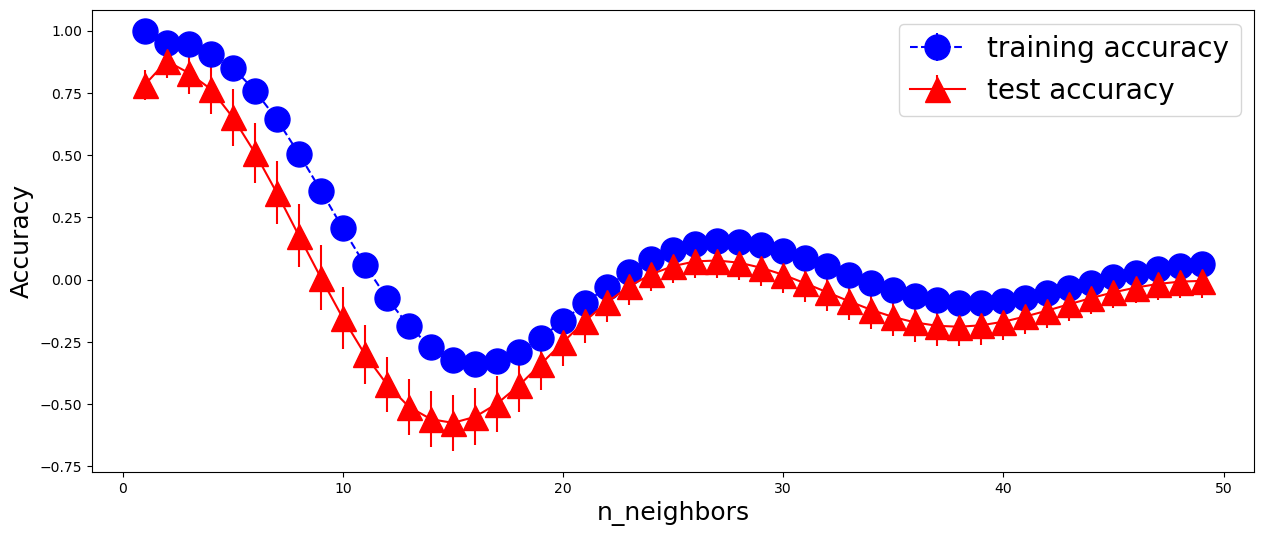

In [13]:
fig = plt.figure(figsize=(15, 6))

params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, all_train.mean(axis=1),
             yerr=all_train.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.errorbar(neighbors_settings, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

**With 3 neighbors, the model is just right.** This means it captures enough of the underlying patterns in the data without being overly sensitive to noise or outliers, resulting in strong performance on both training and testing data. On the other hand, with 1 neighbor, the model fits too closely to the training data, leading to overfitting. With 5, 10, or 100 neighbors, the model is rigid and fails to capture enough of the data's complexity, resulting in underfitting and consequently lower scores on both training and testing data.